<a href="https://colab.research.google.com/github/GabrieleKasputyte/Duomenu-gavyba/blob/main/Regression_isuic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [4]:
# read the data
url="https://raw.githubusercontent.com/erinijapranckeviciene/MLdata/main/Kaggle-data-suic.csv"
data = pd.read_csv(url)

In [5]:
print(data.columns)

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'HDI for year',
       ' gdp_for_year ($) ', 'gdp_per_capita ($)', 'generation'],
      dtype='object')


In [6]:
isuic=data.drop(['suicides/100k pop', 'country-year', 'HDI for year',
       ' gdp_for_year ($) ', 'generation'], axis=1)
print(isuic.columns)

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'gdp_per_capita ($)'],
      dtype='object')


In [7]:
salis = isuic[(isuic['country']=="Germany")]
salis

,country,year,sex,age,suicides_no,population,gdp_per_capita ($)
9710,Germany,1990,male,75+ years,1516,1717700,23546
9711,Germany,1990,male,55-74 years,2406,6593100,23546
9712,Germany,1990,male,35-54 years,3302,11127100,23546
9713,Germany,1990,female,75+ years,1174,3978800,23546
9714,Germany,1990,male,25-34 years,1488,6721200,23546
...,...,...,...,...,...,...,...
10017,Germany,2015,female,35-54 years,800,11616616,43201
10018,Germany,2015,female,25-34 years,193,5061297,43201
10019,Germany,2015,female,15-24 years,136,4195185,43201
10020,Germany,2015,female,5-14 years,13,3517216,43201


In [8]:
gm = salis[(salis['sex']=="male")]
gm

,country,year,sex,age,suicides_no,population,gdp_per_capita ($)
9710,Germany,1990,male,75+ years,1516,1717700,23546
9711,Germany,1990,male,55-74 years,2406,6593100,23546
9712,Germany,1990,male,35-54 years,3302,11127100,23546
9714,Germany,1990,male,25-34 years,1488,6721200,23546
9716,Germany,1990,male,15-24 years,800,5565400,23546
...,...,...,...,...,...,...,...
10011,Germany,2015,male,55-74 years,2304,9436572,43201
10012,Germany,2015,male,35-54 years,2267,11854531,43201
10013,Germany,2015,male,25-34 years,721,5336932,43201
10016,Germany,2015,male,15-24 years,376,4520300,43201


In [9]:
X = gm[["year", "population", 'gdp_per_capita ($)']]
X

,year,population,gdp_per_capita ($)
9710,1990,1717700,23546
9711,1990,6593100,23546
9712,1990,11127100,23546
9714,1990,6721200,23546
9716,1990,5565400,23546
...,...,...,...
10011,2015,9436572,43201
10012,2015,11854531,43201
10013,2015,5336932,43201
10016,2015,4520300,43201


In [10]:
X1 = gm[["year"]]
X1

,year
9710,1990
9711,1990
9712,1990
9714,1990
9716,1990
...,...
10011,2015
10012,2015
10013,2015
10016,2015


In [11]:
X2 = gm[["year","age", "population", 'gdp_per_capita ($)']]
X2

,year,age,population,gdp_per_capita ($)
9710,1990,75+ years,1717700,23546
9711,1990,55-74 years,6593100,23546
9712,1990,35-54 years,11127100,23546
9714,1990,25-34 years,6721200,23546
9716,1990,15-24 years,5565400,23546
...,...,...,...,...
10011,2015,55-74 years,9436572,43201
10012,2015,35-54 years,11854531,43201
10013,2015,25-34 years,5336932,43201
10016,2015,15-24 years,4520300,43201


In [12]:
X2_dummies=pd.get_dummies(X2)
list(X2_dummies.columns)
X2_dummies

,year,population,gdp_per_capita ($),age_15-24 years,age_25-34 years,age_35-54 years,age_5-14 years,age_55-74 years,age_75+ years
9710,1990,1717700,23546,0,0,0,0,0,1
9711,1990,6593100,23546,0,0,0,0,1,0
9712,1990,11127100,23546,0,0,1,0,0,0
9714,1990,6721200,23546,0,1,0,0,0,0
9716,1990,5565400,23546,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
10011,2015,9436572,43201,0,0,0,0,1,0
10012,2015,11854531,43201,0,0,1,0,0,0
10013,2015,5336932,43201,0,1,0,0,0,0
10016,2015,4520300,43201,1,0,0,0,0,0


In [13]:
Y = gm['suicides_no']
Y

9710     1516
9711     2406
9712     3302
9714     1488
9716      800
         ... 
10011    2304
10012    2267
10013     721
10016     376
10021       6
Name: suicides_no, Length: 156, dtype: int64

In [14]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X2_dummies, Y)

# Make predictions using the testing set
y_pred = regr.predict(X2_dummies)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(Y, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(Y, y_pred))

Coefficients: 
 [-1.98106133e+01  1.23126337e-04  2.13080987e-03 -6.24030357e+02
 -2.88534232e+02  7.99178628e+02 -1.08011796e+03  7.66567731e+02
  4.26936186e+02]
Mean squared error: 24303.86
Coefficient of determination: 0.98


In [15]:
print('Intercept: \n', regr.intercept_)

Intercept: 
 40173.536301893066


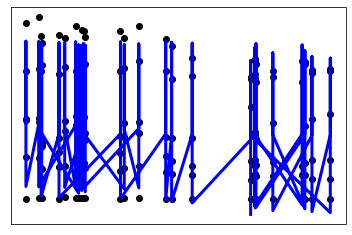

In [16]:
# Plot outputs
plt.scatter(X2_dummies['gdp_per_capita ($)'], Y,  color='black')
plt.plot(X2_dummies['gdp_per_capita ($)'], y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()